---
title: Numerical Integration in Julia
venue: Modules
---

<b> QuadGK </b> package for 1D integration: https://juliamath.github.io/QuadGK.jl/stable/

In [32]:
import QuadGK as qgk
import Plots as Plt
import ApproxFun as af
import LaTeXStrings as ltx
using Pkg
using Cubature

Automatic numeric evaluation of a simple integral with adaptive <b> Gauss-Konrod </b> scheme, only need to specify function and interval boundaries: $\int_{-1}^1 5x^4 \ dx= \left[x^5\right]_{-1}^1=2$

In [2]:
# Define the function
f(x) = 5 * x^4

# Define endpoints of integration interval [a, b]
interval_a, interval_b = -1, 1

# Evaluate the integral numerically
result, error = qgk.quadgk(f, interval_a, interval_b)

using Printf
@printf "Numerical result for the integral is %f, error is %e" result error

Numerical result for the integral is 2.000000, error is 4.440892e-16

Get quadrature points and weights for <b> Gauss quadrature </b>:

In [3]:
# Specify number of weights
N = 3

# Calculate quadrature points and weights
x, weights = qgk.gauss(N, interval_a, interval_b)

@printf "Gaussian quadrature points for the interval [-1, 1] are: %f,%f,%f\n" x[1] x[2] x[3] 
@printf "Weights for the quadrature points within the interval [-1, 1] are: %f,%f,%f" weights[1] weights[2] weights[3] 

Gaussian quadrature points for the interval [-1, 1] are: -0.774597,0.000000,0.774597
Weights for the quadrature points within the interval [-1, 1] are: 0.555556,0.888889,0.555556

Visualize the Gauss quadrature points on the interval [-1, 1]:

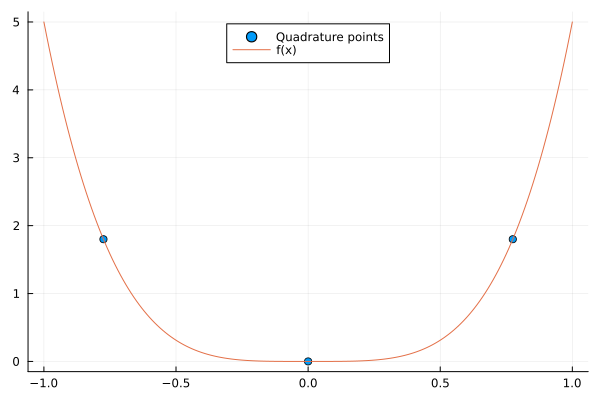

In [4]:
xfine = range(-1, 1, step=0.01)
Plt.scatter(x, f.(x), label="Quadrature points")
Plt.plot!(xfine, f.(xfine), label="f(x)", legend=:top)

Calculate integral with quadrature points and weights: $\int_a^b f(x) \ dx \approx \sum w_i\cdot  f(x_i)$ 

In [5]:
result = sum(weights .* f.(x))
@printf "Numerical integral from %i quadrature points is %1.16f, exact value is 2.0 " N result 

Numerical integral from 3 quadrature points is 2.0000000000000004, exact value is 2.0 

<b> Number of Gauss quadrature points vs. accuracy for polynomials of different orders </b>

In [21]:
function gquad_error(order,NQuad)
        #f(x) =x^order, order should be even
        f(x)=(order+1)*x^order
        x,weights=qgk.gauss(NQuad, interval_a, interval_b)
        result=qgk.quadgk(f,interval_a,interval_b)[1]-sum(weights.*f.(x))
end

gquad_error (generic function with 1 method)

Let $n=2m$ be the even order of a polynomial function $f(x)=x^n$. Then a minimum of $n/2+1=m+1$ Gauss quadrature points are needed to compute the integral exactly on the interval $[-1,1]$ (to within machine precision). If $n=2m+1$ is odd, then $1$ single quadrature point is needed.

In [22]:
N_order=16
N_QPoints=8
err=gquad_error(N_order,N_QPoints);
@printf "Error for numerical integral of order %i using %i quadrature points is %e\n" N_order N_QPoints err

N_order=16
N_QPoints=9
err=gquad_error(N_order,N_QPoints);
@printf "Error for numerical integral of order %i using %i quadrature points is %e\n" N_order N_QPoints err

N_order=15
N_QPoints=1
err=gquad_error(N_order,N_QPoints);
@printf "Error for numerical integral of order %i using %i quadrature points is %e\n" N_order N_QPoints err

Error for numerical integral of order 16 using 8 quadrature points is 6.037302e-09
Error for numerical integral of order 16 using 9 quadrature points is -2.220446e-16
Error for numerical integral of order 15 using 1 quadrature points is 9.995117e-01


<b> Comparison with other integration schemes </b>

A general numerical integration scheme, also called quadrature, is based on the evaluation of the function $f(x)$ at a finite number of points $x_0=a,\dots,x_n=b$ within the integration interval $[a,b]$. It  can be written as:

\begin{equation}
    \int_a^b f(x)\, dx \approx h \sum_{i=0}^n w_if(x_i) =  h \bigl[ w_0f(x_0)+w_1f(x_1)+\cdots w_nf(x_n) \bigr],
  \end{equation}

<b> Example: Trapezoid formula </b> (https://tobydriscoll.net/fnc-julia/localapprox/integration.html) 

\begin{split}
  \int_a^b f(x)\, dx \approx T_f(n) &= h\left[
    \frac{1}{2}f(x_0) + f(x_1) + f(x_2) + \cdots + f(x_{n-1}) +
    \frac{1}{2}f(x_n) \right].
\end{split}

In [23]:
 """
     trapezoid(f,a,b,n)
 
 Apply the trapezoid integration formula for integrand `f` over
 interval [`a`,`b`], broken up into `n` equal pieces. Returns
 the equidistant quadrature points, and the quadrature weights on these points (0.5 for the first and
 last point, one for all interior points)
"""
 function trapezoid(a,b,n)
    h = (b-a)/(n+1)
    x = range(a,b,length=n+2)
      weights =ones(1,n+2)*h
      weights[1]*=0.5
      weights[n+2]*=0.5
   
    return x,weights
end

trapezoid

Compare Trapezoid scheme with Gauss quadrature  for $\int_{-1}^1 7x^6 \ dx =2 $ using the same number of interior points:

In [24]:
f6(x)=7*x^6

f6 (generic function with 1 method)

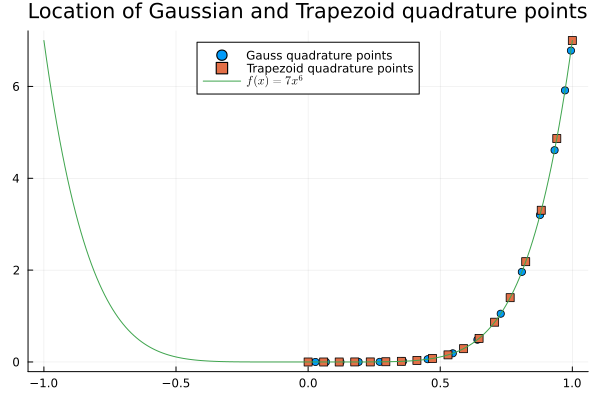

In [29]:

#Fix number of interior points for both Gauss and Trapezoid
N_interior=16

#Get quadrature points and weights for the trapezoid scheme
x_t,weights_t =trapezoid(interval_a,interval_b,N_interior)
#Gauss
x_g,weights_g=qgk.gauss(N_interior, interval_a, interval_b)

xfine=(-1:0.01:1)
Plt.scatter(x_g,f6.(x_g),label="Gauss quadrature points")
Plt.scatter!(x_t,f6.(x_t),m=:rect,label="Trapezoid quadrature points")
Plt.plot!(xfine,f6.(xfine),label=ltx.L"f(x)=7x^6",legend=:top, title="Location of Gaussian and Trapezoid quadrature points")
#Plotly.plot([trace0,trace1,trace2])

In [30]:
#Trapezoid error
result_trapezoid=sum(weights_t*f6.(x_t))
error_trapezoid=abs(result_trapezoid-2.0)

#Gauss error

result_gauss=sum(weights_g.*f6.(x_g))
error_gauss=abs(result_gauss-2.0)

print("Using ", N_interior, " quadrature points, error for Trapezoid is ",error_trapezoid,", error for Gauss is ", error_gauss)

Using 16 quadrature points, error for Trapezoid is 0.9879032349943775, error for Gauss is 0.9999999999999991

<b> Multi-dimensional integration: Cubature package</b> (https://github.com/JuliaMath/Cubature.jl) 

<b> Example: </b> $\int_{[0,1]\times[0,1]} 4xy\  dx dy = \int_0^1 \int_0^1 4xy\ dx dy =\int_0^1 \left[2yx^2 \right]_{x=0}^{x=1} dy = \int_0^1 2y dy  = 1 $

In [33]:
#Define function on 2D box
f2d(x)=4*x[1]*x[2]

#Define integration boundaries
xmin=[0 0]
xmax=[1 1]

1×2 Matrix{Int64}:
 1  1

In [34]:
result,error=hcubature(f2d, xmin, xmax);
@printf "Numerical result for the integral is %1.16f, error is %1.16e" result error

Numerical result for the integral is 1.0000000000000000, error is 0.0000000000000000e+00

# In-Class Exercise

<b> Simpson's integration formula</b> with $n=2m+2, m\geq 1$ even interior points is given by </b>

  \begin{split}
    \int_a^b f(x)\, dx \approx  \frac{h}{3}\bigl[ &f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + \cdots\\
    &+ 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \bigr].
  \end{split}
  
  

<b> Exercises 1 and 6 from https://tobydriscoll.net/fnc-julia/localapprox/integration.html#exercises): </b>
For $m= 2^k, k=1,2,\dots,10$, use $2m+1$ interior points to evaluate the following integrals using both the Trapezoid as well as the Simpson scheme. For each function, plot the error as a function of $k$ for each integration scheme.

 $I_1= \int_0^1 x\log(1+x)\, dx = \frac{1}{4}$
 
 $I_2 =\int_0^1 \sqrt{1-x^2}\,\, dx = \frac{\pi}{4}$
 
 <b> Solution:</b>


In [35]:
 function simpson(a,b,m)
    n = 2*m+2 #last index n in the Simpson formula
    
    h = (b-a)/n
    x = range(a,b,length=n+1)
    weights = ones(1,n+1)+ 1.0/3.0*transpose(cos.((1:1:n+1)*pi))
    weights[1]=1.0/3.0
    weights[n+1]=1.0/3.0
    weights*=h
    return x,weights
end



simpson (generic function with 1 method)

In [36]:
f(x)=x*log(1+x)

f (generic function with 1 method)

In [37]:
#Compare Simpson and Trapezoid scheme for a single m=10

interval_a=0
interval_b=1

#Fix parameter m for both Simpson and Trapezoid
m = 2

# Number N of interior points from m
N=2*m+2

#Get quadrature points and weights for the trapezoid scheme
x_t,weights_t =trapezoid(interval_a,interval_b,N)

#Simpson
x_s,weights_s=simpson(interval_a, interval_b,m)

xfine=(interval_a:0.01:interval_b)

#Trapezoid error
result_trapezoid=sum(weights_t*f.(x_t))
error_trapezoid=abs(result_trapezoid-0.25)

#Simpson error

result_simpson=sum(weights_s*f.(x_s))
error_simpson=abs(result_simpson-0.25)

print("Using ", N, " quadrature points, error for Trapezoid is ",error_trapezoid,", error for Simpson is ", error_simpson)

Using 6 quadrature points, error for Trapezoid is 0.002027723715007035, error for Simpson is 1.0337512111491254e-5

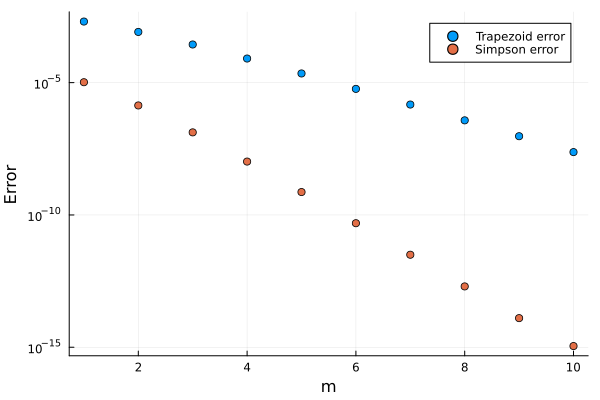

In [39]:
#plot error as function of m
m=1
Ntotal=10
error_t=zeros(Ntotal,1)
error_s=zeros(Ntotal,1)
for k=1:Ntotal
   m *= 2

# Number N of interior points from m
  N=2*m+2

#Get quadrature points and weights for the trapezoid scheme
  x_t,weights_t =trapezoid(interval_a,interval_b,N)

#Simpson
  x_s,weights_s=simpson(interval_a, interval_b,m)

  xfine=(interval_a:0.01:interval_b)

#Trapezoid error
  result_trapezoid=sum(weights_t*f.(x_t))
  error_t[k]=abs(result_trapezoid-0.25)

#Simpson error

  result_simpson=sum(weights_s*f.(x_s))
  error_s[k]=abs(result_simpson-0.25)
end

Nrange=(1:1:Ntotal)
Plt.scatter(Nrange,error_t,label="Trapezoid error")
Plt.scatter!(Nrange,error_s,label="Simpson error", yaxis=:log,xlabel="m",ylabel="Error")
